# 초모수와 모델 검증

## 모델 검증에 대한 고려 사항

In [1]:
#잘못된 방식의 모델 검증
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target



In [2]:
from sklearn.neighbors import KNeighborsClassifier as KN
model = KN(n_neighbors=1)

In [3]:
model.fit(X, y)
y_model = model.predict(X)

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

In [5]:
# 올바른 방식의 모델 검증: 검증 표본

from sklearn.model_selection import train_test_split


In [6]:
X1, X2, y1, y2 = train_test_split(X, y, random_state = 0, train_size = 0.5)

In [7]:
model.fit(X1, y1)

KNeighborsClassifier(n_neighbors=1)

In [8]:
y2_model = model.predict(X2)

In [9]:
accuracy_score(y2, y2_model)

0.9066666666666666

In [10]:
# 교차검증을 통한 모델 검증

y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)

accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)


(0.96, 0.9066666666666666)

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [13]:
from sklearn.model_selection import LeaveOneOut

In [14]:
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [15]:
scores.mean()

0.96

### 최적으 모델 선택ㅎ기

#### 편향-분산 트레이드 오프

편향과 분산 사이의 트레이드오프에서 가장 효율적인 점을 찾기
- 고편형 모델: 과적합       

- 고분산 모델: 과적합

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [17]:
def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [18]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10-1./(X.ravel()+0.1)
    
    if err >  0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

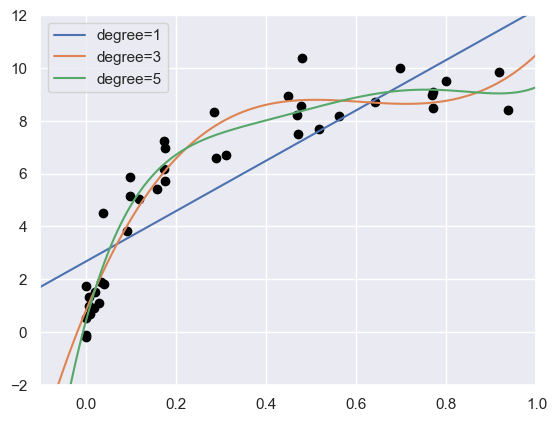

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color = 'black')
axis = plt.axis()

for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
    
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')

In [20]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)

In [21]:
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

TypeError: too many positional arguments

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

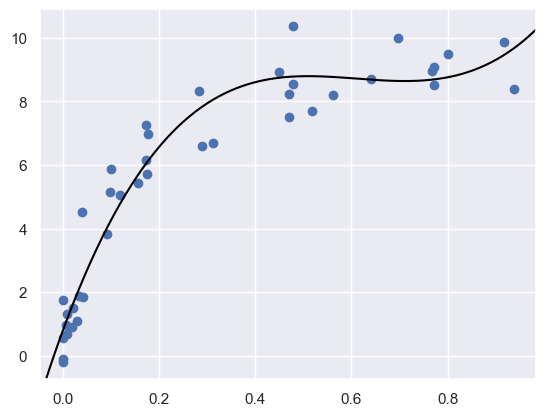

In [22]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(degree = 3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, color='black');
plt.axis(lim)

### 학습 곡선

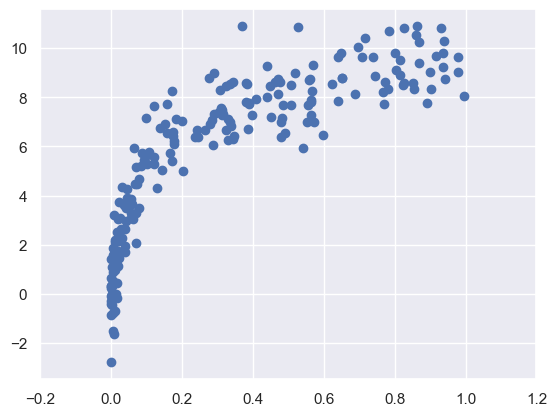

In [23]:
X2, y2 = make_data(200)
plt.xlim(-0.2, 1.2)
plt.scatter(X2.ravel(), y2)

In [24]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, 'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

TypeError: too many positional arguments

In [25]:
# Scikit-learn 학습곡선
from sklearn.model_selection import learning_curve

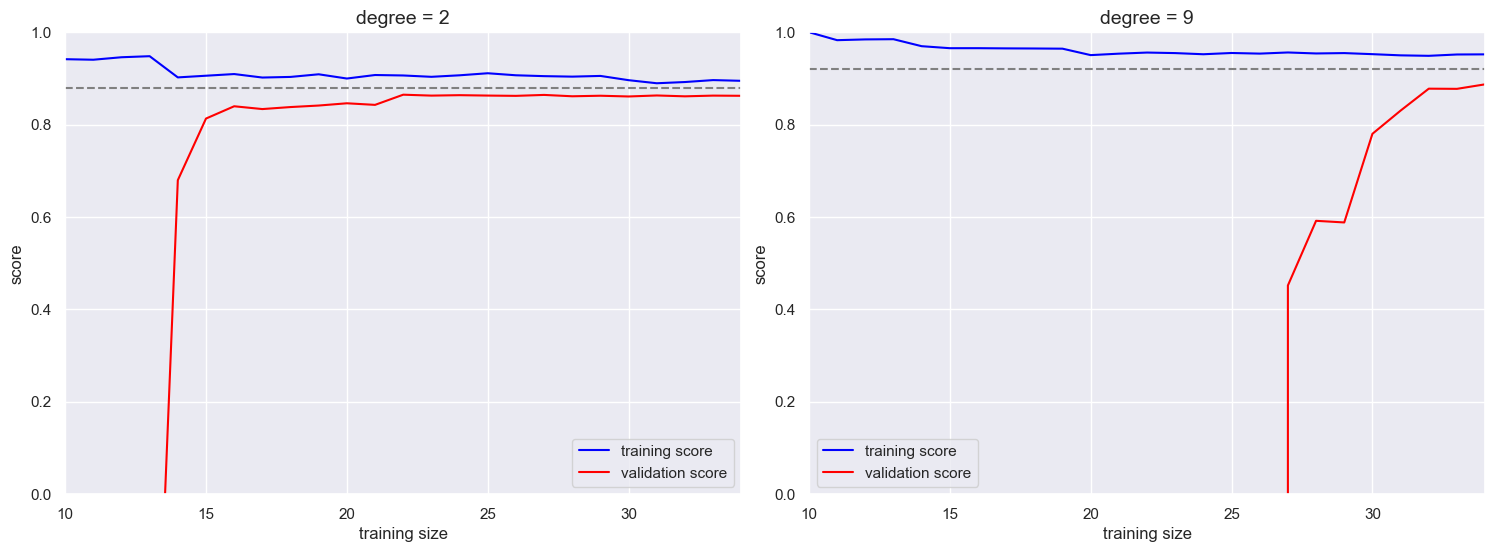

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i , degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y, cv=7, train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

In [27]:
# 실제 검증: 그리드 검색
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree' : np.arange(21),
                           'linearregression__fit_intercept' : [True, False],
                           'linearregression__normalize' : [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [29]:
grid.fit(x, y)

NameError: name 'x' is not defined

In [30]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [31]:
model = grid.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

## 특징 공학

### 범주 특징

In [33]:
data = [
    {'price' : 850000, 'rooms' : 4, 'neighborhood' : 'Queen Anne'},
    {'price' : 700000, 'rooms' : 3, 'neighborhood' : 'Fremont'},
    {'price' : 650000, 'rooms' : 3, 'neighborhood' : 'Wallingford'},
    {'price' : 600000, 'rooms' : 2, 'neighborhood' : 'Fremont'}]

In [34]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse = False, dtype = int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [35]:
vec.get_feature_names()

AttributeError: 'DictVectorizer' object has no attribute 'get_feature_names'

In [36]:
vec = DictVectorizer(sparse = True, dtype = int)
vec.fit_transform(data)

<Compressed Sparse Row sparse matrix of dtype 'int32'
	with 12 stored elements and shape (4, 5)>

In [37]:
# 텍스트 특징

sample = ['problem of evil', 'evil queen', 'horizon problem']

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7 stored elements and shape (3, 5)>

In [39]:
import pandas as pd
pd.DataFrame(X.toarray(), columns = vec.get_feature_names())

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns = vec.get_feature_names())

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'

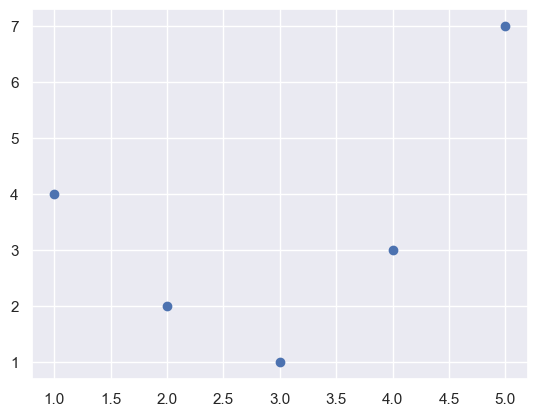

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y)

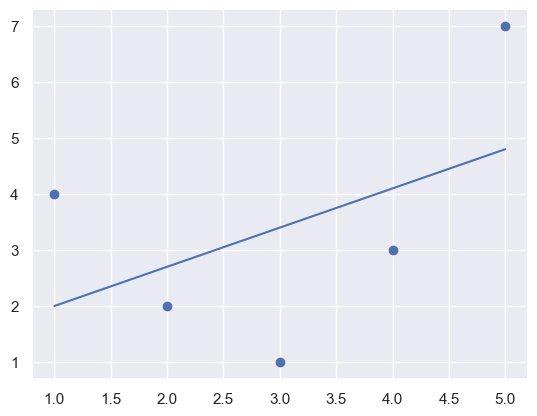

In [42]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit)

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3, include_bias = False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


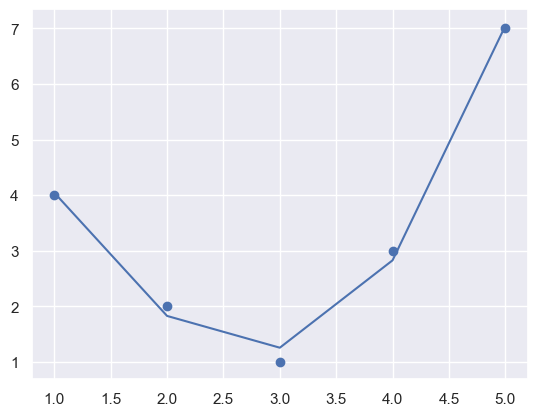

In [44]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit)

In [45]:
# 누락 데이터의 대체

from numpy import nan
X = np.array([[nan, 0, 3], [3, 7, 9],[3, 5, 2], [4, nan, 6], [8, 8, 1]])
y = np.array([14, 16, -1, 8, -5])

In [46]:
from sklearn.impute import SimpleImputer as Imputer
imp = Imputer(strategy = 'mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [47]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

In [48]:
# 특정 파이프 라인

from sklearn.pipeline import make_pipeline
model = make_pipeline(Imputer(strategy = 'mean'), PolynomialFeatures(degree = 2), LinearRegression())

In [49]:
model.fit(X, y)
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


## 나이즈 베이즈 분류

### 베이즈 분류

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

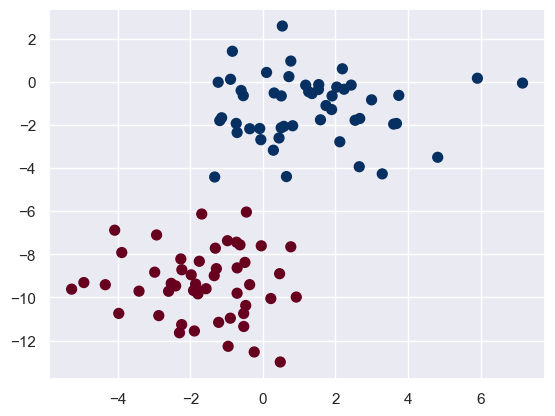

In [51]:
# 가우스 나이즈 베이즈

from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')

In [52]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB()

In [53]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18]*rng.rand(2000, 2)
ynew = model.predict(Xnew)

(-5.890554373486014,
 7.777566725032841,
 -13.775943665162341,
 3.3634536696825847)

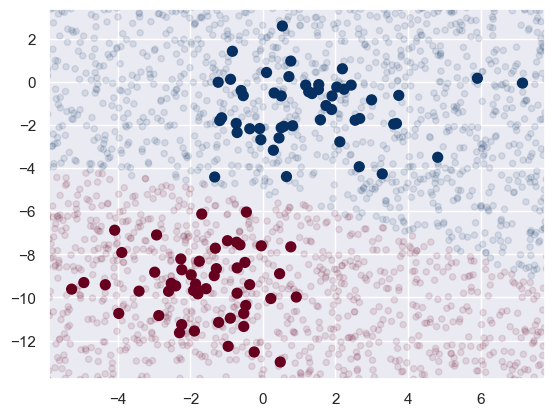

In [54]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)

In [55]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [56]:
# 다항분포 나이브 베이즈 분류

from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [57]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [58]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [60]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(110.44999999999996, 0.5, 'predicted label')

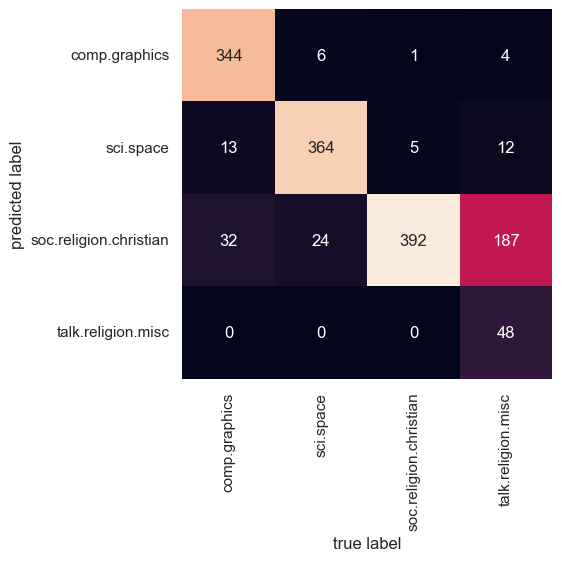

In [61]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square = True, annot = True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [62]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [63]:
predict_category('sending a payload to the ISS')

'sci.space'

In [64]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [65]:
predict_category('determining the screen resolution')

'comp.graphics'

## 다양체 학습

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np


In [67]:
# 다양체 학습: Hello

def make_hello(N = 1000, rseed = 42):
    # "HELLO" 텍스트로 플로팅해서 PNG 파일로 저장
    fig, ax = plt.subplots(figsize = (4, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va = 'center', ha = 'center', weight = 'bold', size = 85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # 이 PNG 파일을 열어 임의의 점을 추출
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

C:\Users\pjung\AppData\Local\Temp\ipykernel_11172\3771711335.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorize = dict(c = X[:, 0], cmap = plt.cm.get_cmap('rainbow', 5))


(-0.09759837474609756,
 4.129761441745652,
 0.043259321063934555,
 0.999098744761459)

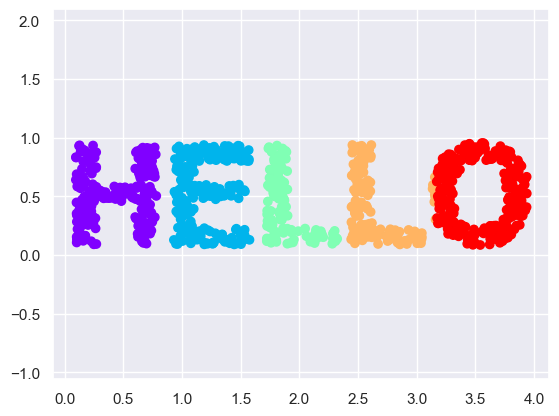

In [68]:
X = make_hello(1000)
colorize = dict(c = X[:, 0], cmap = plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal')

In [69]:
# 다차원 적도법

def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

(4.607678232445618, 8.746682208062794, 5.035821528466808, 7.243272110369881)

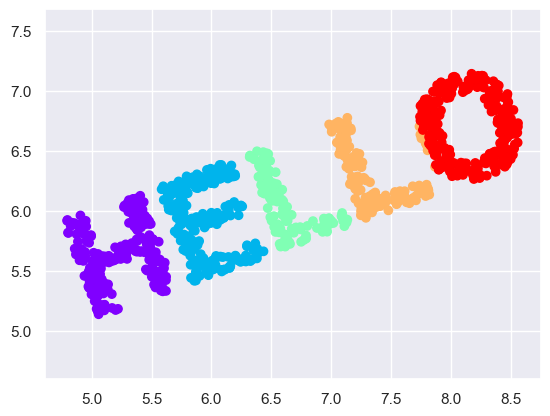

In [70]:
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal')

In [71]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

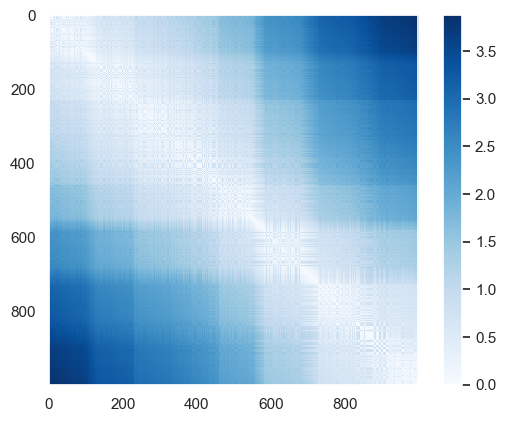

In [72]:
plt.imshow(D, zorder = 2, cmap = 'Blues', interpolation = 'nearest')
plt.colorbar()

In [73]:
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

(-1.064777958160055, 0.9987369762605118, -2.07925671453261, 2.126752999284894)

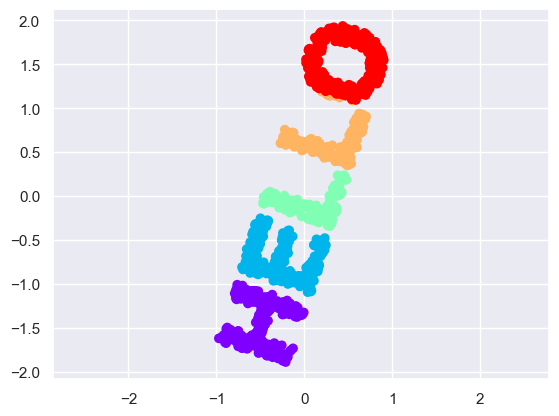

In [74]:
from sklearn.manifold import MDS
model = MDS(n_components = 2, dissimilarity = 'precomputed', random_state = 1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal')

In [75]:
# 다양체 학습으로서의 MDS

def random_projection(X, dimension = 3, rseed = 42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])

In [76]:
X3 = random_projection(X, 3)
X3.shape

(1000, 3)

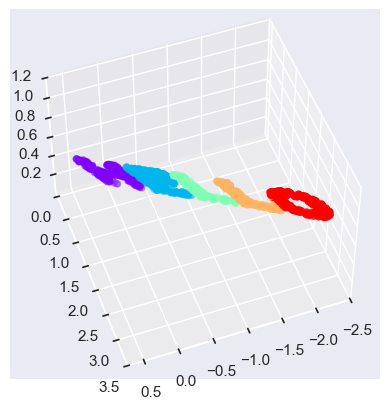

In [77]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection = '3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2], **colorize)
ax.view_init(azim = 70, elev = 50)

(-1.0647779581600545, 0.998736976260511, -2.07925671453261, 2.126752999284893)

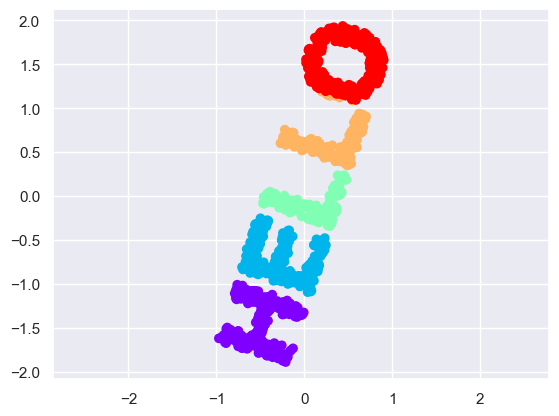

In [78]:
model = MDS(n_components = 2, random_state = 1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal')

In [79]:
# 비선형 임베딩: MDS가 실패한 경우

def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

In [80]:
XS = make_hello_s_curve(X)

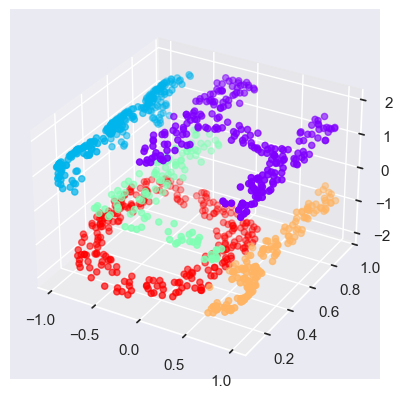

In [81]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection = '3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2], **colorize)

(-2.2575566208928204,
 2.1266575048280236,
 -1.700085773594125,
 1.5129421448595446)

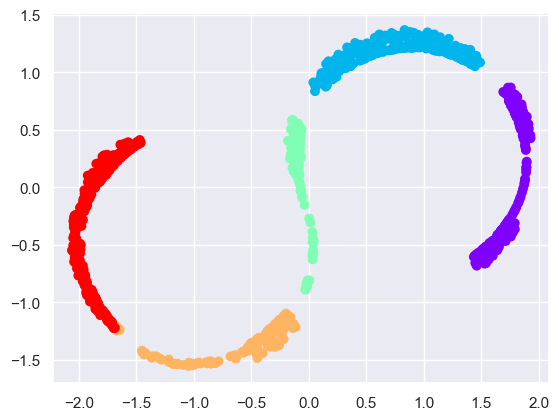

In [82]:
from sklearn.manifold import MDS
model = MDS(n_components = 2, random_state = 2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal')

In [83]:
# 비선형 다양체 학습: 국소 선형 임베딩
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors = 100, n_components = 2, method = 'modified', eigen_solver = 'dense')
out = model.fit_transform(XS)

(0.15, -0.15)

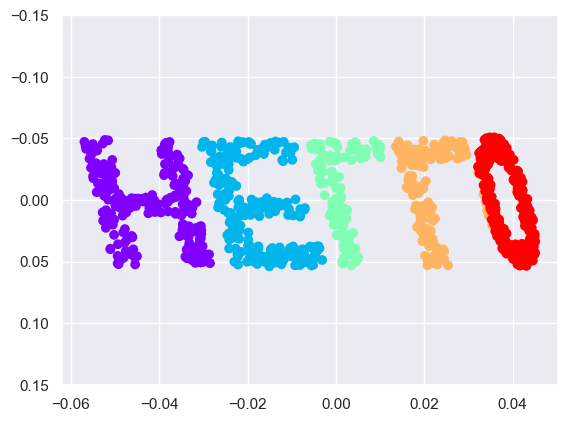

In [84]:
fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15)

## 가우스 혼합 모델

In [86]:
# K 평균의 약점

# 데이터 생성
from sklearn.datasets import make_blobs

# Generate synthetic data with 400 samples, 4 cluster centers, and a standard deviation of 0.60
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

# Reverse the order of the columns in X
X = X[:, ::-1]



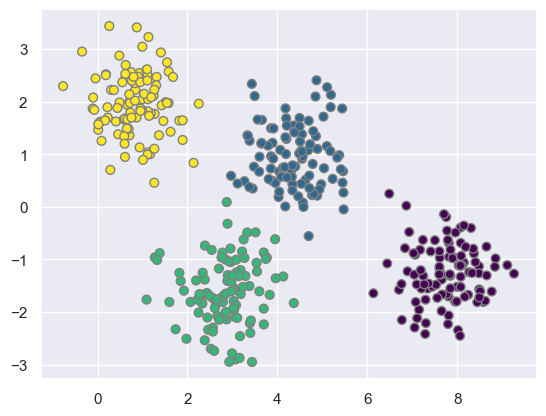

In [87]:
# K-평균 레이블로 데이터를 플로팅
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state = 0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 40, cmap = 'viridis', edgecolor = 'gray')

In [88]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters = 4, rseed = 0, ax = None):
    labels = kmeans.fit_predict(X)
    
    # 입력 데이터 플로팅
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c = labels, s = 40, cmap = 'viridis', zorder = 2, edgecolor = 'gray')
    
    # K-평균 모델 표시
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc = '#CCCCCC', lw = 3, alpha = 0.5, zorder = 1))

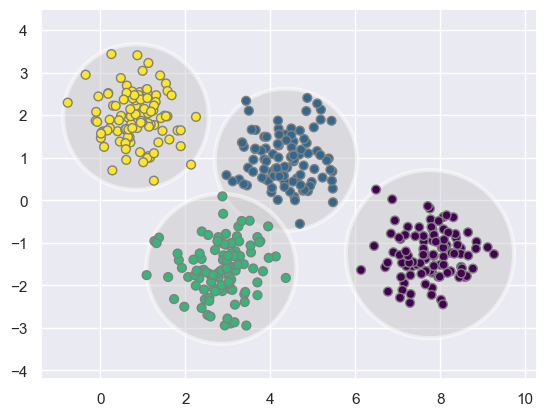

In [89]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
plot_kmeans(kmeans, X)

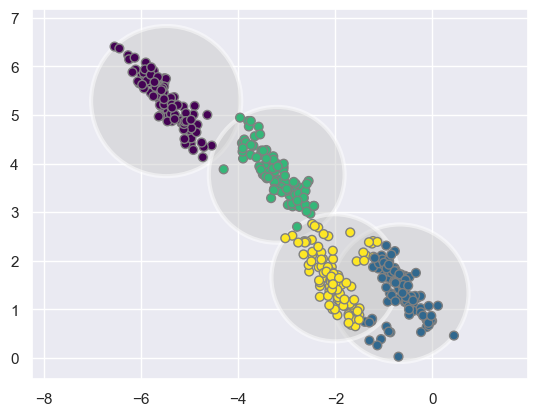

In [90]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters = 4, random_state = 0)
plot_kmeans(kmeans, X_stretched)

## E-M단계 일반화하기: 가우스 혼합 모델

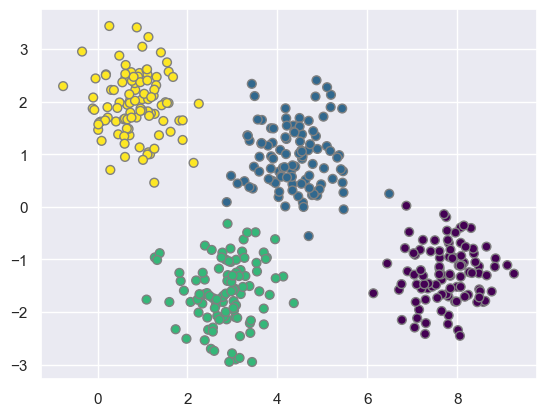

In [91]:
from sklearn.mixture import GaussianMixture as GMM

gmm = GMM(n_components = 4, random_state = 0).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 40, cmap = 'viridis', edgecolor = 'gray')

In [92]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.469 0.531 0.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]]


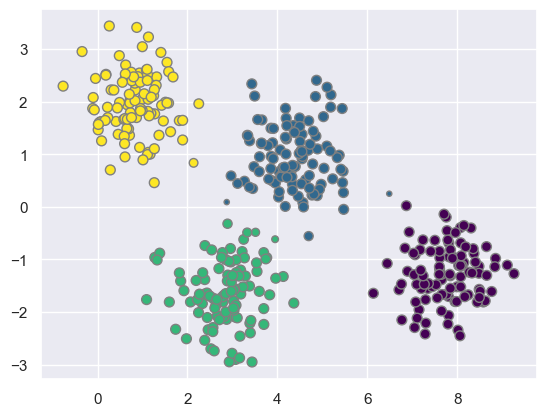

In [93]:
size = 50 * probs.max(1) ** 2 # 제곱으로 차이를 강조
plt.scatter(X[:, 0], X[:, 1], c = labels, cmap = 'viridis', s = size, edgecolor = 'gray')

In [94]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax = None, **kwargs):
    ''' 주어진 위치와 공분산으로 타원 그리기'''
    ax = ax or plt.gca()
    
    # 공분산을 주축으로 전환
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
        
    # 타원 그리기
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

In [95]:
def plot_gmm(gmm, X, label = True, ax = None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    
    if label:
        ax.scatter(X[:, 0], X[:, 1], c = labels, s = 40, cmap = 'viridis', zorder = 2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s = 40, zorder = 2)
    
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha = w * w_factor)

TypeError: Ellipse.__init__() takes 4 positional arguments but 5 were given

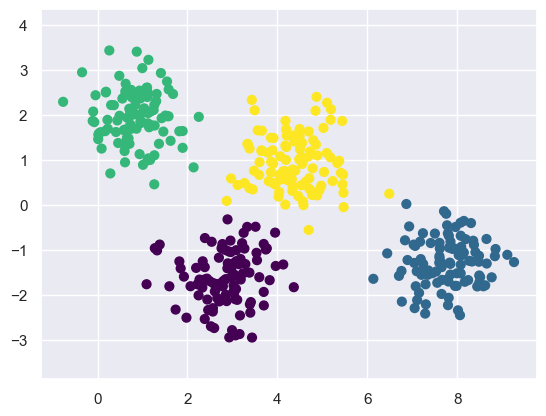

In [96]:
gmm = GMM(n_components = 4, random_state = 42)
plot_gmm(gmm, X)

TypeError: Ellipse.__init__() takes 4 positional arguments but 5 were given

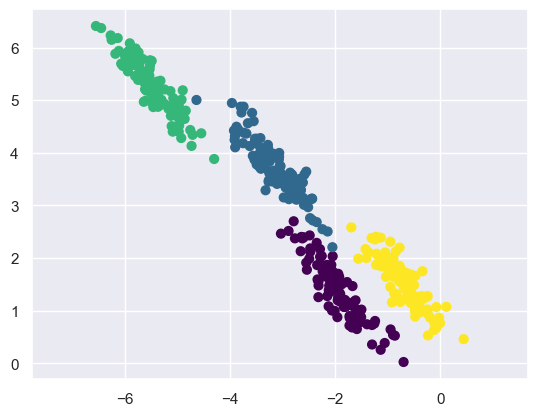

In [97]:
gmm = GMM(n_components = 4, covariance_type = 'full', random_state = 42)
plot_gmm(gmm, X_stretched)

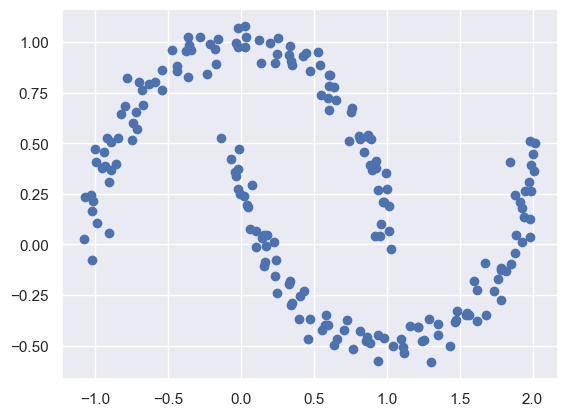

In [98]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise = .05, random_state = 0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1])

TypeError: Ellipse.__init__() takes 4 positional arguments but 5 were given

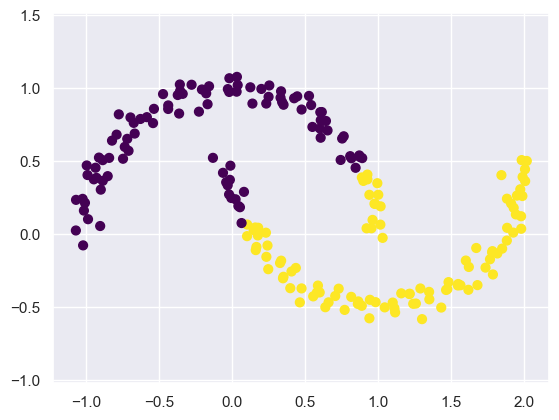

In [99]:
gmm2 = GMM(n_components = 2, covariance_type = 'full', random_state = 0)
plot_gmm(gmm2, Xmoon)

TypeError: Ellipse.__init__() takes 4 positional arguments but 5 were given

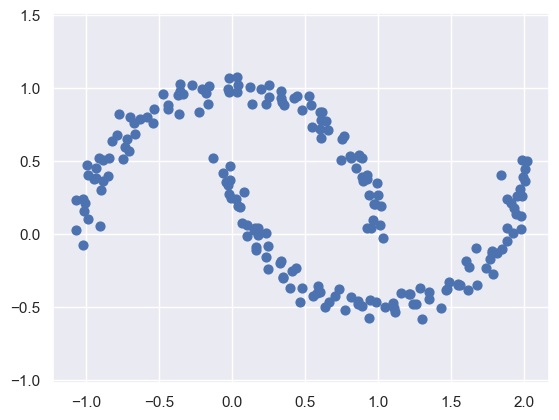

In [100]:
gmm16 = GMM(n_components = 16, covariance_type = 'full', random_state = 0)
plot_gmm(gmm16, Xmoon, label = False)

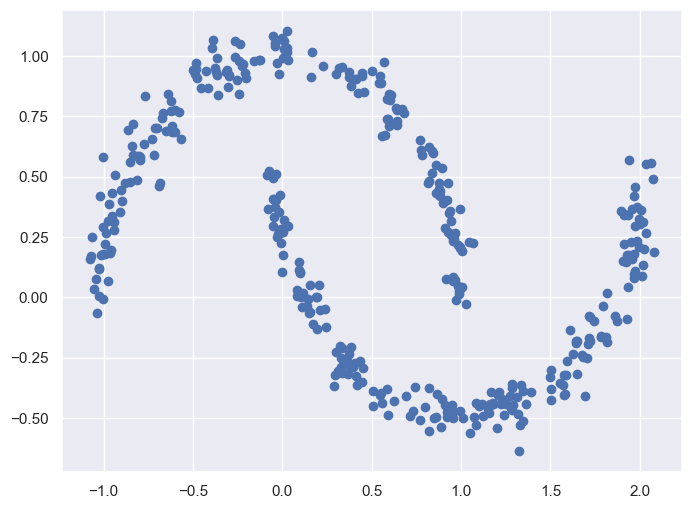

In [101]:
Xnew, ynew = gmm16.sample(400)
plt.figure(figsize = (8, 6))
plt.scatter(Xnew[:, 0], Xnew[:, 1])

Text(0.5, 0, 'n_components')

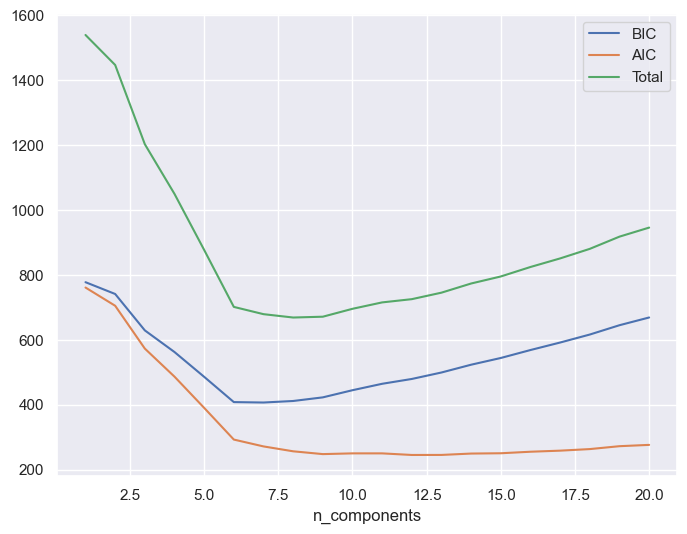

In [102]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type = 'full', random_state = 0).fit(Xmoon) for n in n_components]

plt.figure(figsize = (8, 6))
plt.plot(n_components, [m.bic(Xmoon) for m in models], label = 'BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label = 'AIC')
plt.plot(n_components, [x+y for x, y in zip([m.aic(Xmoon) for m in models], [m.bic(Xmoon) for m in models])]  , label = 'Total')
plt.legend(loc = 'best')
plt.xlabel('n_components')